In [2]:
!pip install tenseal


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# !pip install opencv-python
# ! pip install matplotlib

In [1]:
import cv2

from secPysift import *

img1 = cv2.imread('box.png', 0)
# resize to 20 x 20
img1 = cv2.resize(img1, (20, 20))

In [4]:
img1.shape

(20, 20)

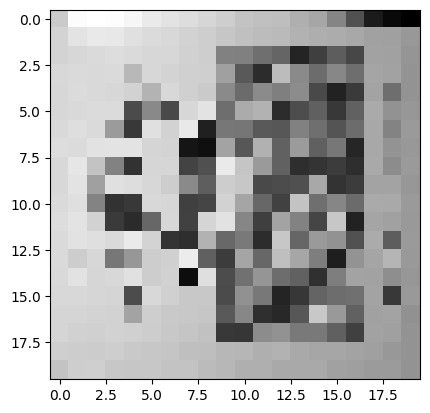

<Figure size 1000x1000 with 0 Axes>

In [3]:
from matplotlib import pyplot as plt
def plot_image(img, figure_size=(10, 10)):
    plt.imshow(img, cmap='gray')
    plt.figure(figsize=figure_size)
    plt.show()

plot_image(img1)

In [4]:
img1.shape

(20, 20)

In [5]:
import numpy as np
import tenseal as ts

In [6]:
## Encryption Parameters

# controls precision of the fractional part
bits_scale = 26

# Create TenSEAL context
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[31, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, 31]
)

# set the scale
context.global_scale = pow(2, bits_scale)

# galois keys are required to do ciphertext rotations
context.generate_galois_keys()

secret_key = context.secret_key()
context.make_context_public()

In [7]:
def enc(image):
    enc_img = [[ts.ckks_vector(context=context, vector=[col]) for col in row] for row in image]
    enc_img = np.array(enc_img, dtype=ts.CKKSVector)

    return enc_img


In [8]:
# enc_img = [[ts.ckks_vector(context=context, vector=[col]) for col in row] for row in img1]
# enc_img = np.array(enc_img, dtype=ts.CKKSVector)
# enc_img

In [9]:
# enc_img = enc(img1)

In [10]:
# base_image = secGenerateBaseImage(enc_img, 1.6, 0.5, kernel_size=3)

In [11]:
# base_image.shape

In [12]:
def dec(image):
    return np.array([[x.decrypt(secret_key) for x in row] for row in image])

In [13]:
# temp = dec(base_image)

In [14]:
# plot_image(dec(base_image))

In [15]:
num_octaves = secComputeNumberOfOctaves(img1.shape)

In [16]:
num_octaves

3

In [17]:
gaussian_kernels = secGenerateGaussianKernels(1.6, 3)

In [18]:
gaussian_kernels

array([1.6       , 1.2262735 , 1.54500779, 1.94658784, 2.452547  ,
       3.09001559])

In [19]:
# gaussian_images = secGenerateGaussianImages(base_image, num_octaves, gaussian_kernels)

In [20]:
# gaussian_images[0][0].shape

In [21]:
# for oct in range(num_octaves):
#     for i in range(len(gaussian_images[oct])):
#         cv2.imwrite(f'img-{oct}-{i}.png',dec(gaussian_images[oct][i]))

In [22]:
gaussian_images = [[cv2.imread(f'img-{oct}-{i}.png', 0) for i in range(6)] for oct in range(num_octaves) ]

In [23]:
gaussian_images[0][0].shape

(20, 20)

Octave 1


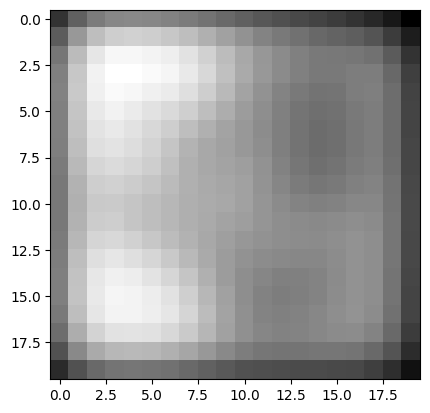

<Figure size 500x500 with 0 Axes>

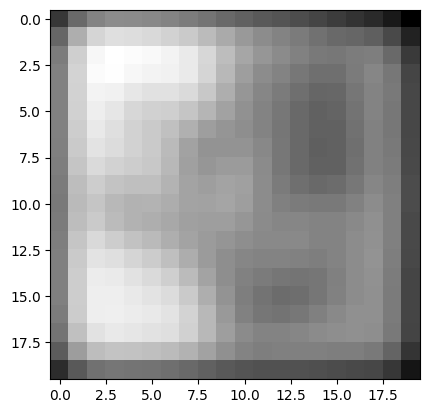

<Figure size 500x500 with 0 Axes>

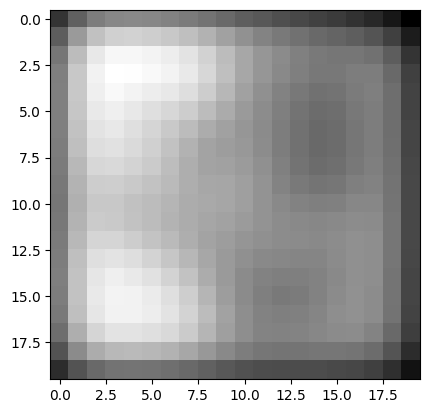

<Figure size 500x500 with 0 Axes>

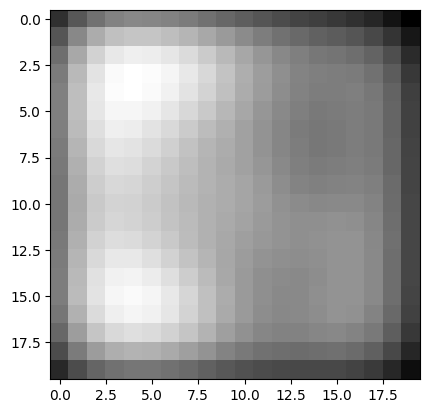

<Figure size 500x500 with 0 Axes>

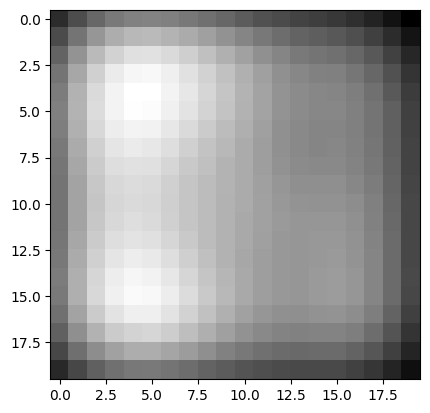

<Figure size 500x500 with 0 Axes>

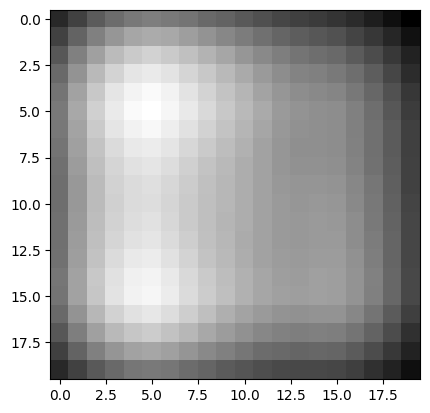

<Figure size 500x500 with 0 Axes>

Octave 2


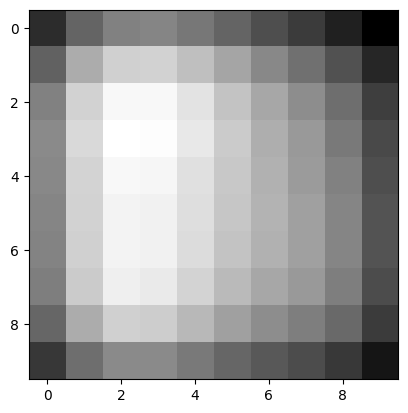

<Figure size 500x500 with 0 Axes>

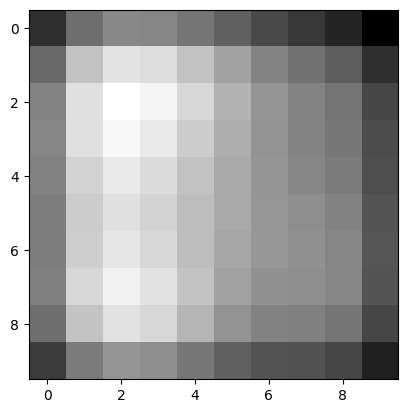

<Figure size 500x500 with 0 Axes>

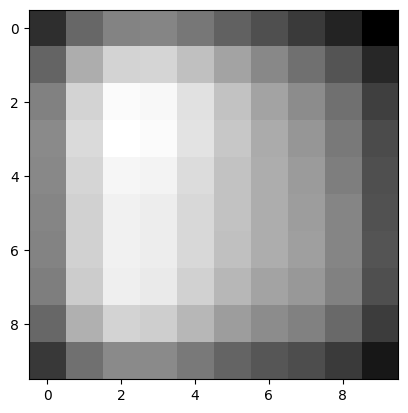

<Figure size 500x500 with 0 Axes>

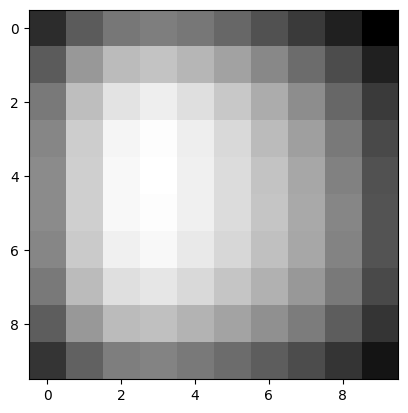

<Figure size 500x500 with 0 Axes>

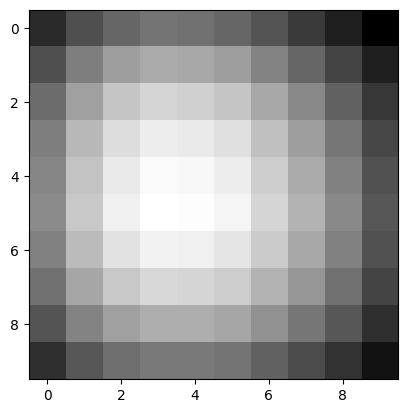

<Figure size 500x500 with 0 Axes>

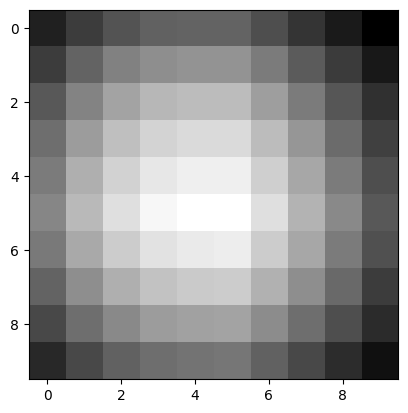

<Figure size 500x500 with 0 Axes>

Octave 3


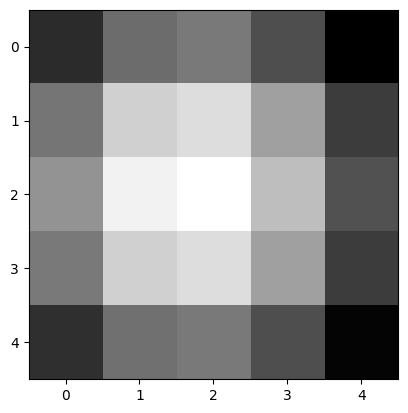

<Figure size 500x500 with 0 Axes>

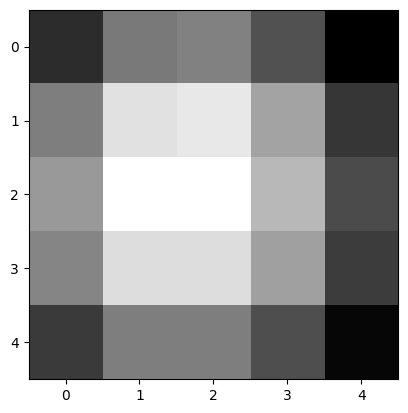

<Figure size 500x500 with 0 Axes>

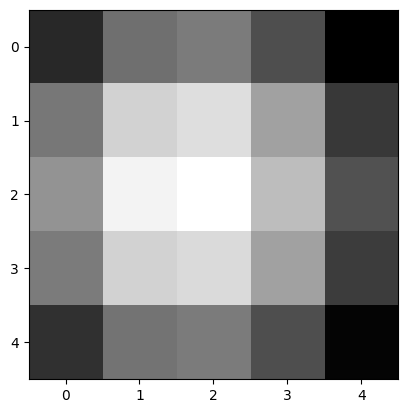

<Figure size 500x500 with 0 Axes>

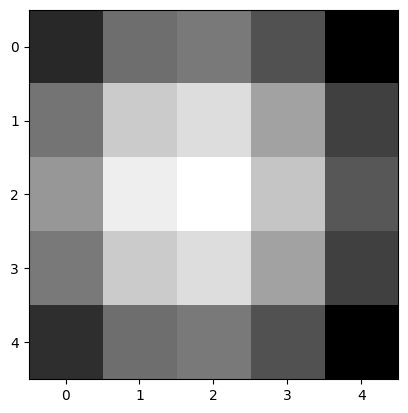

<Figure size 500x500 with 0 Axes>

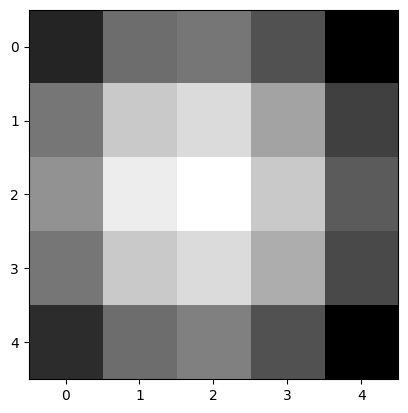

<Figure size 500x500 with 0 Axes>

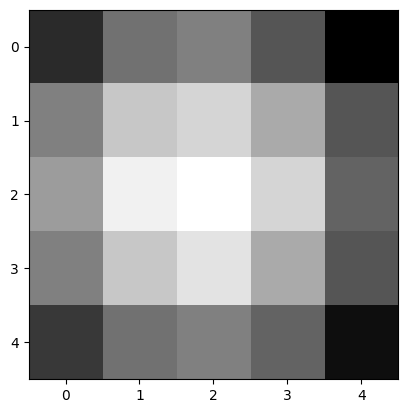

<Figure size 500x500 with 0 Axes>

In [24]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for image in gaussian_images[octave]:
        plot_image(image, figure_size=(5, 5))

In [25]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for i in range(len(gaussian_images[octave])):
        gaussian_images[octave][i] = enc(gaussian_images[octave][i])

Octave 1
Octave 2
Octave 3


In [26]:
# dog_images = secGenerateDoGImages(gaussian_images)

In [27]:
# dog_images[0][0].shape

In [28]:
# for octave in range(num_octaves):
#     print(f'Octave {octave + 1}')
#     for image in dog_images[octave]:
#         plot_image(dec(image), figure_size=(5, 5))

In [29]:
# for oct in range(num_octaves):
#     for i in range(len(dog_images[oct])):
#         cv2.imwrite(f'dog-img-{oct}-{i}.png',dec(dog_images[oct][i]))

In [30]:
dog_images = [[cv2.imread(f'dog-img-{oct}-{i}.png', 0) for i in range(5)] for oct in range(num_octaves) ]

In [31]:
dog_images[0][0]

array([[ 4, 10, 10,  8,  6,  5,  5,  5,  5,  4,  5,  5,  5,  5,  4,  3,
         2,  2,  2,  0],
       [ 9, 19, 21, 18, 15, 14, 14, 14, 13, 11, 10, 10, 10, 10,  9,  8,
         8, 10, 10,  4],
       [ 8, 19, 19, 14, 12, 12, 12, 13, 11,  7,  5,  5,  5,  5,  4,  4,
         8, 12, 13,  6],
       [ 5, 15, 14,  8,  4,  5,  6,  9,  6,  2,  0,  0,  0,  0,  0,  0,
         3, 10, 13,  6],
       [ 4, 13, 11,  3,  0,  0,  2,  5,  4,  0,  0,  0,  0,  0,  0,  0,
         0,  8, 11,  5],
       [ 5, 14, 11,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  8, 10,  4],
       [ 5, 14, 11,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  7, 10,  4],
       [ 5, 14, 11,  3,  1,  2,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0,
         0,  7, 11,  4],
       [ 6, 14, 10,  2,  2,  4,  2,  0,  0,  1,  4,  1,  0,  0,  0,  0,
         0,  6, 11,  5],
       [ 6, 13,  7,  0,  0,  3,  2,  0,  0,  4,  5,  1,  0,  0,  0,  0,
         0,  6, 11,  5],
       [ 5, 12,  5,  0,  0,  0

Octave 1


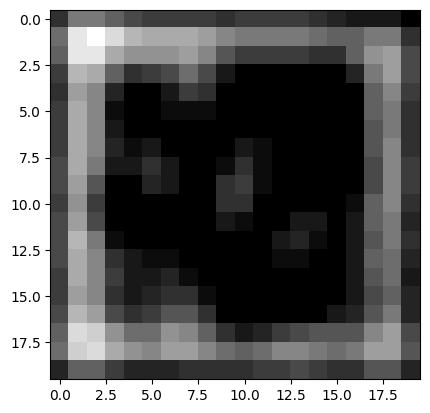

<Figure size 500x500 with 0 Axes>

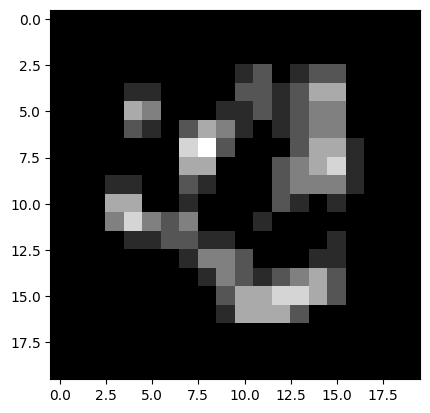

<Figure size 500x500 with 0 Axes>

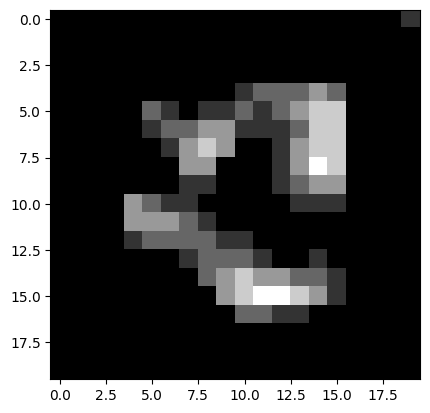

<Figure size 500x500 with 0 Axes>

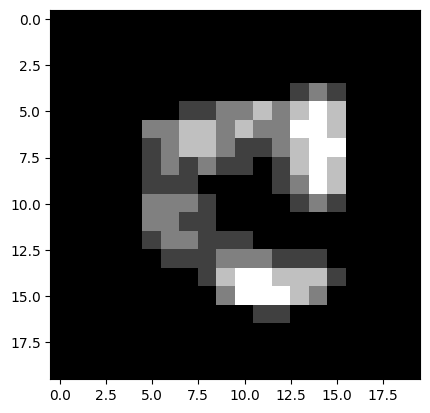

<Figure size 500x500 with 0 Axes>

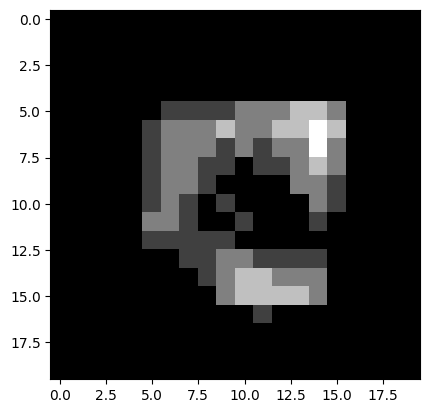

<Figure size 500x500 with 0 Axes>

Octave 2


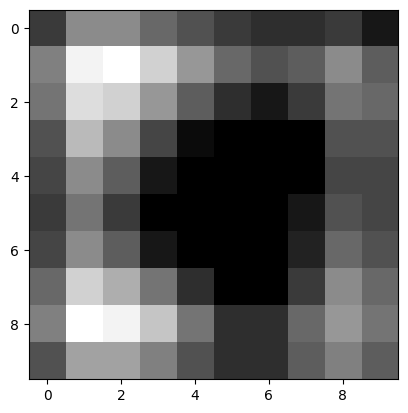

<Figure size 500x500 with 0 Axes>

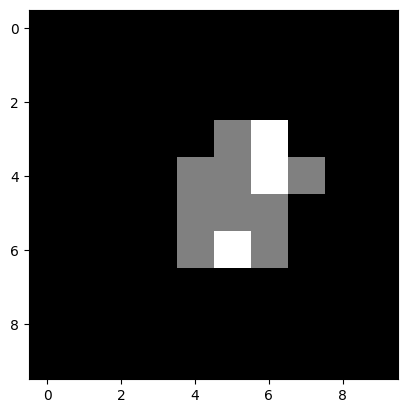

<Figure size 500x500 with 0 Axes>

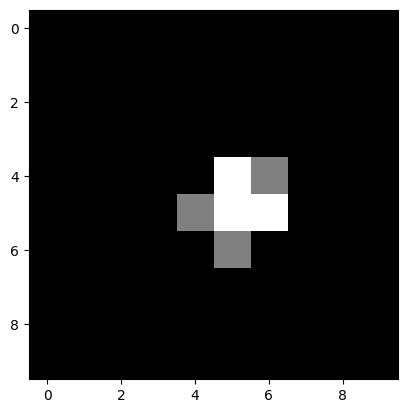

<Figure size 500x500 with 0 Axes>

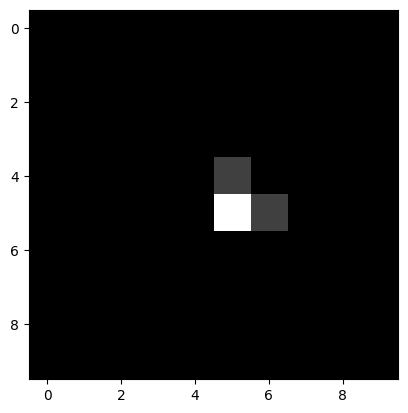

<Figure size 500x500 with 0 Axes>

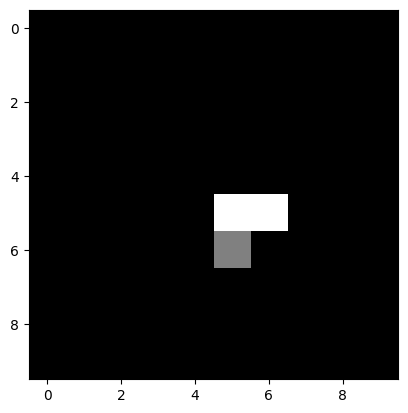

<Figure size 500x500 with 0 Axes>

Octave 3


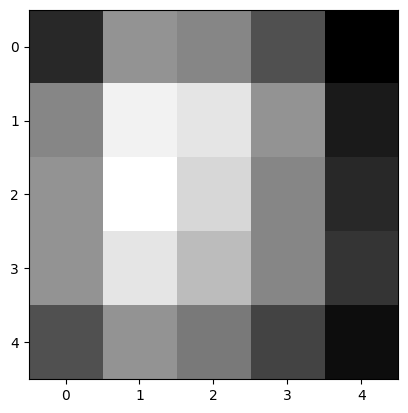

<Figure size 500x500 with 0 Axes>

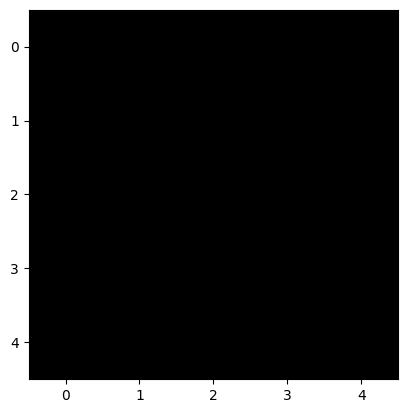

<Figure size 500x500 with 0 Axes>

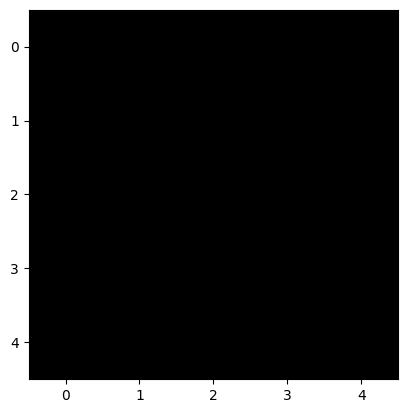

<Figure size 500x500 with 0 Axes>

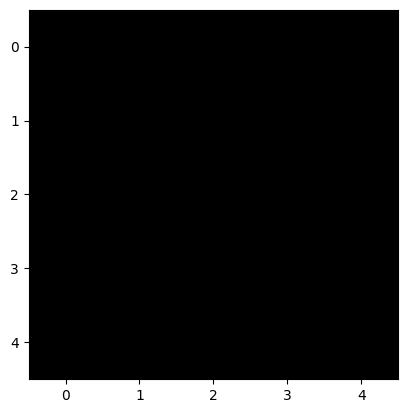

<Figure size 500x500 with 0 Axes>

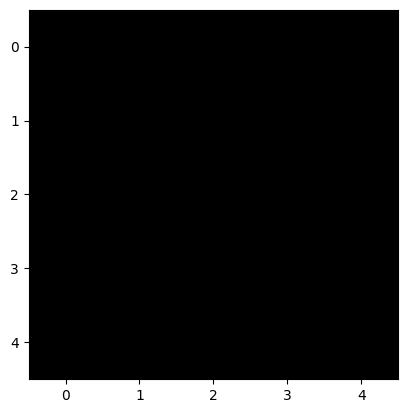

<Figure size 500x500 with 0 Axes>

In [32]:
for octave in range(num_octaves):
    print(f'Octave {octave + 1}')
    for image in dog_images[octave]:
        plot_image(image, figure_size=(5, 5))

In [33]:
def cmp(x, a, b):
    if isinstance(x, ts.CKKSVector):
        x = x.decrypt(secret_key)
    if isinstance(a, ts.CKKSVector):
        a = a.decrypt(secret_key)
    if isinstance(b, ts.CKKSVector):
        b = b.decrypt(secret_key)
    return ts.ckks_vector(context=context, vector=[int(a < x < b)])
    

In [ ]:
sigma=1.6
num_intervals=3
assumed_blur=0.5
image_border_width=5

: 

In [ ]:
for octave in range(num_octaves):
    for i in range(len(dog_images[octave])):
        dog_images[octave][i] = enc(dog_images[octave][i])

In [ ]:

keypoints = secFindScaleSpaceExtrema(gaussian_images, dog_images, num_intervals, sigma, image_border_width, cmp=cmp)

Num attempts:  1


ValueError: scale out of bounds